# questions for analysis

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as snb
%matplotlib inline

# Data wrangling

In [51]:
df= pd.read_csv(r"C:\Users\hp\Downloads\KaggleV2-May-2016.csv")
df.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [52]:
df.shape 

(110527, 14)

In [53]:
df.duplicated().sum()

0

In [54]:
#number of unique values
df["PatientId"].nunique()

62299

In [55]:
df["PatientId"].duplicated().sum()

48228

In [56]:
df.duplicated(["PatientId","No-show"]).sum()

38710

In [57]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [58]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [59]:
#identifying the row ingex of -1 value for the age 
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


# Data cleaning

In [60]:
#removing the -1 value for a 
df.drop(index=99832, inplace=True) 

In [61]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [62]:
#correction of columns names
df.rename(columns={'Hipertension': 'Hypertension'},inplace=True)
df.rename (columns={'No-show': 'No_show'}, inplace=True) 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
#removing duplicated Ids with duplicated showing status, leaving the duplicated Ids if they differ in the showing status
# as the same patient may have several appointments , attend some and absent from others
df.drop_duplicates(['PatientId', 'No_show'], inplace=True)

In [64]:
df.shape

(71816, 14)

In [65]:
df .columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [66]:
#removing unnecessary aata 
df.drop(['PatientId','AppointmentID', 'ScheduledDay', 'AppointmentDay'],axis=1, inplace=True)
df. head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Visualiztion

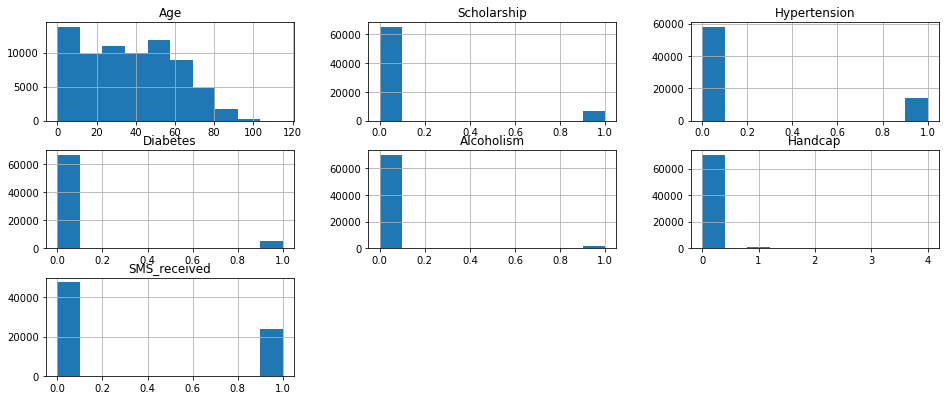

In [67]:
# Use this, and more cone cells, to explore your data. Don't forget to add 
# Markdown cells to dacument your observations and findings.
df.hist(figsize=(16,6.5));

In [68]:
#dividing the patients to 2 groups acc to showing or not then exploring them
show=df.No_show=='No' 
noshow=df.No_show=='Yes'
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [69]:
df[show].mean(),df[noshow].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_25728\3233283171.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[show].mean(),df[noshow].mean()


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

# Investigation for the influencing factors on the attendance rate

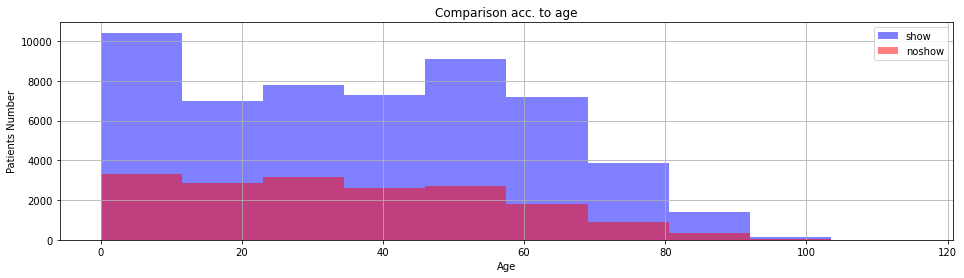

In [72]:
# does age affect the attendence
def attendance (df, col_name, attended, absent):# setting
    plt.figure(figsize= [16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='blue',label="show") 
    df[col_name][noshow].hist(alpha=.5,bins=10,color='red',label='noshow') 
    plt. legend();
    plt.title('Comparison acc. to age')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance (df, 'Age', show, noshow)

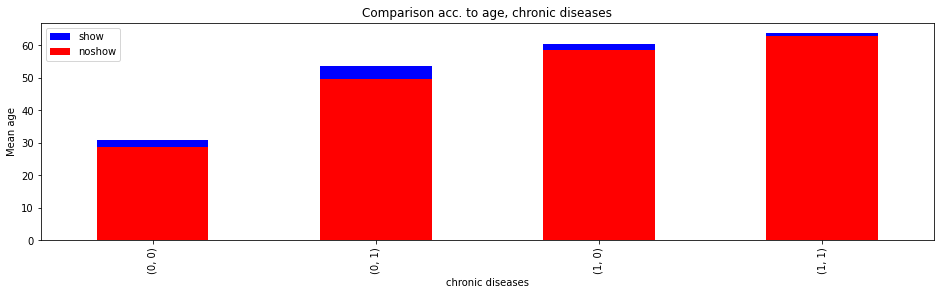

In [76]:
# does age and chronic aiseases affect the attendence together
plt.figure(figsize=[16,4])# setting the figure size
df [show].groupby (['Hypertension', 'Diabetes']).mean()['Age'].plot (kind='bar',color='blue',label='show') 
df [noshow].groupby (['Hypertension', 'Diabetes']).mean() ['Age'].plot(kind='bar',color='red', label='noshow') 
plt.legend();
plt.title('Comparison acc. to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel ('Mean age');

In [78]:
df[show].groupby(["Hypertension","Diabetes"]).mean()["Age"],df[noshow].groupby(["Hypertension","Diabetes"]).mean()["Age"]

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

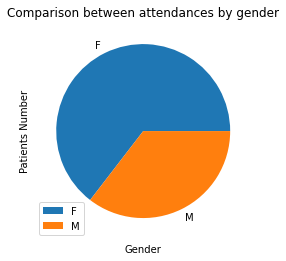

In [79]:
# what is the percentage of sexes attending?
def attendance (df, col_name, attended, absent):
    plt.figure(figsize=[12,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt. title('Comparison between attendances by gender')
    plt.xlabel ('Gender')
    plt.ylabel('Patients Number');
attendance (df, 'Gender', show, noshow)

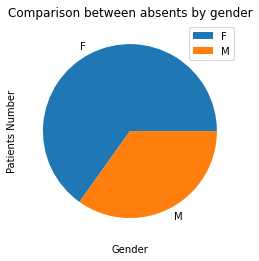

In [81]:
# what is the percentage of sexes absent?
def attendance(df,col_name, attended, absent):
    plt.figure(figsize=[12,4])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('Comparison between absents by gender')
    plt.xlabel('Gender')
    plt.ylabel ('Patients Number');
attendance (df, 'Gender', show, noshow)

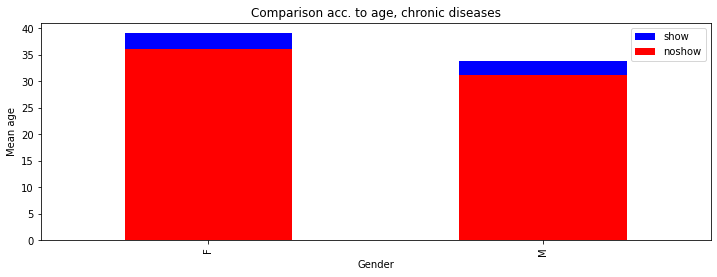

In [84]:
# does age and chronic gender affect the attenderce together (check by gender mean age)
plt.figure(figsize=[12,4])# setting the figure size 
df[show].groupby('Gender').Age.mean().plot(kind='bar', color='blue', label='show') 
df[noshow].groupby('Gender').Age.mean().plot(kind='bar', color='red', label='noshow') 
plt.legend();
plt. title('Comparison acc. to age, chronic diseases') 
plt.xlabel('Gender') 
plt.ylabel('Mean age');

In [85]:
print(df[show].groupby('Gender').Age.mean(), df [noshow].groupby ('Gender') .Age.mean(), 
      df[show].groupby('Gender').Age.median(), df [noshow].groupby('Gender').Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39.0
M    32.0
Name: Age, dtype: float64 Gender
F    34.0
M    29.0
Name: Age, dtype: float64


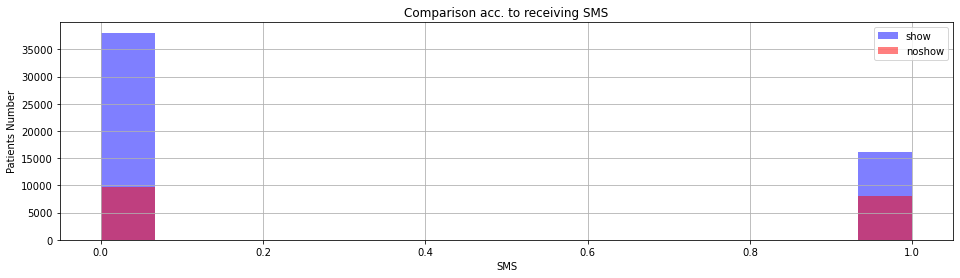

In [87]:
# does receiving SMS affect the attendence
def attendance(df, col_name, attended, absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=15, color='blue', label="show"); 
    df[col_name][noshow].hist(alpha=.5,bins=15,color='red',label="noshow");
    plt.legend ();
    plt. title('Comparison acc. to receiving SMS')
    plt.xlabel ('SMS')
    plt.ylabel('Patients Number');
attendance(df, 'SMS_received', show, noshow)

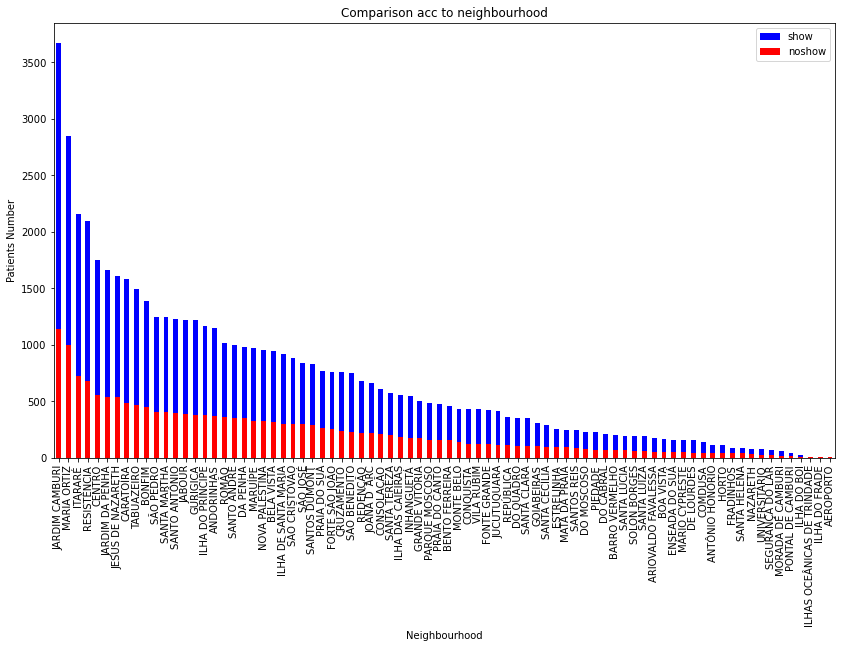

In [89]:
#does neighbourhood affect the attendance 
plt.figure(figsize=[14,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label="show") 
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label="noshow")
plt.legend()
plt.title('Comparison acc to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel( 'Patients Number');

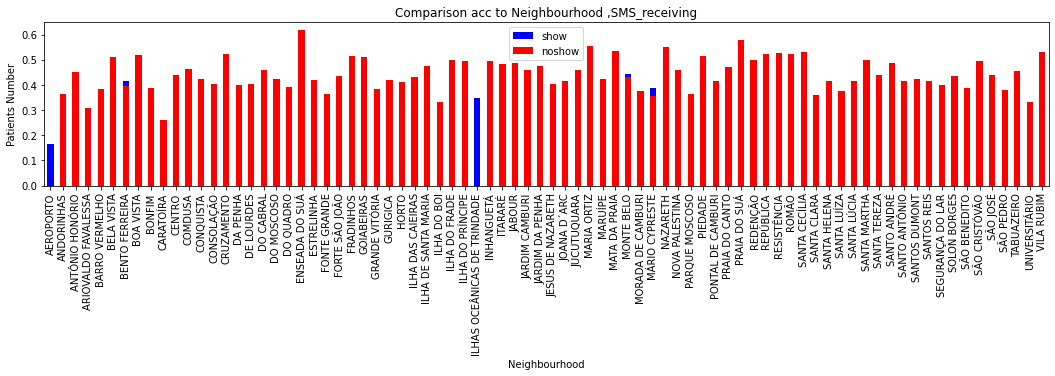

In [92]:
plt.figure (figsize= [18,3])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue', label='show') 
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red', label='noshow') 
plt.legend()
plt.title('Comparison acc to Neighbourhood ,SMS_receiving') 
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

Text(0.5, 0, 'Neighbourhood')

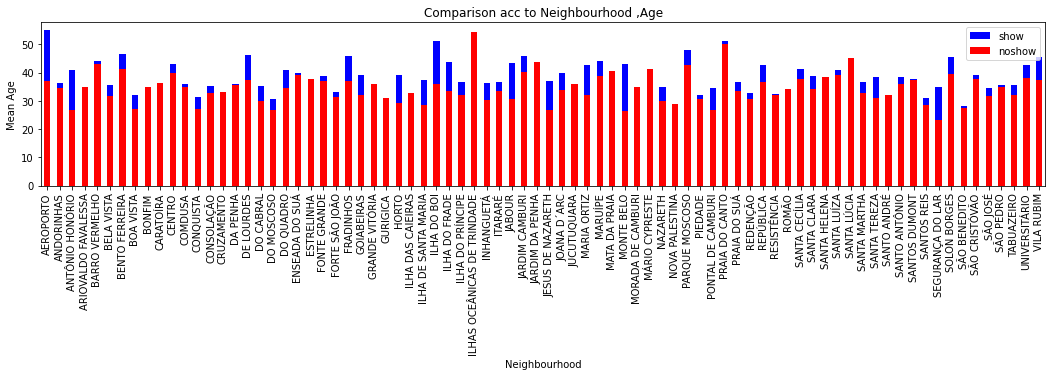

In [93]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar' ,color='blue', label="show")
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind='bar' ,color='red', label="noshow") 
plt.legend()
plt.ylabel ('Mean Age');
plt.title('Comparison acc to Neighbourhood ‚Age')
plt.xlabel('Neighbourhood')

# Conclusions

Neighbourhooh has a great effect on attendence or not, JARDIM CAMBURI has the greatest number of patients and also has the greatest showing rate.                               
Number of showing patients from specific neighbourhood affected by receiving SMS and Ages.
Age has a clear influence on the showing rate Ages from 0: 8 are the most showing(parents taking care of their kids) then from 45:55 and the least attending are whom above 65 years old.                                                  
Number of showing patients without receiving sms is greater than showing patients with receiving sms, which means that we need to revisit our sms compaghin.         

# Limitations
No clear correlation between showing and gender, chronic diseases, enrollement in the welfare program

In [96]:
# to make the code tell me if there any errors in the code above
from subprocess import call 
call (['python','-m', 'nbconvert', 'Investigate_a_Dataset (Data analysis).ipynb'])

1